# 1. Importing Libraries


In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from glob import glob

# 2. Setting Up Kaggle

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d nikhilbartwal001/celeba

Dataset URL: https://www.kaggle.com/datasets/nikhilbartwal001/celeba
License(s): other
 99% 1.30G/1.32G [00:08<00:00, 145MB/s]
100% 1.32G/1.32G [00:08<00:00, 174MB/s]


In [5]:
!unzip celeba.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/197600.jpg  
  inflating: img_align_celeba/197601.jpg  
  inflating: img_align_celeba/197602.jpg  
  inflating: img_align_celeba/197603.jpg  
  inflating: img_align_celeba/197604.jpg  
  inflating: img_align_celeba/197605.jpg  
  inflating: img_align_celeba/197606.jpg  
  inflating: img_align_celeba/197607.jpg  
  inflating: img_align_celeba/197608.jpg  
  inflating: img_align_celeba/197609.jpg  
  inflating: img_align_celeba/197610.jpg  
  inflating: img_align_celeba/197611.jpg  
  inflating: img_align_celeba/197612.jpg  
  inflating: img_align_celeba/197613.jpg  
  inflating: img_align_celeba/197614.jpg  
  inflating: img_align_celeba/197615.jpg  
  inflating: img_align_celeba/197616.jpg  
  inflating: img_align_celeba/197617.jpg  
  inflating: img_align_celeba/197618.jpg  
  inflating: img_align_celeba/197619.jpg  
  inflating: img_align_celeba/197620.jpg  
  inflating: img_align_celeba/197621.jpg  
  i

In [6]:
img_path = '/content/img_align_celeba/*jpg'

In [7]:
imgs = glob(img_path)

In [ ]:
type(imgs)

In [ ]:
len(imgs)

202599

# 3. Loading Image DataSet

In [8]:
def load_images(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img)
    img = img.resize((180, 180))
    img = np.array(img)
    return img

In [ ]:
imgs[0]

'/content/img_align_celeba/186255.jpg'

In [ ]:
img = load_images(imgs[0])

In [ ]:
img = img/255

In [ ]:
img

array([[[0.96862745, 0.94509804, 0.94509804],
        [0.96078431, 0.9372549 , 0.9372549 ],
        [0.94901961, 0.9254902 , 0.9254902 ],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.96078431, 0.94117647, 0.94117647],
        [0.95686275, 0.9372549 , 0.9372549 ],
        [0.95294118, 0.92941176, 0.92941176],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.94901961, 0.9372549 , 0.93333333],
        [0.94901961, 0.93333333, 0.92941176],
        [0.94901961, 0.93333333, 0.92941176],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.01568627, 0.50196078, 0.13333333],
        [0.01960784, 0.50588235, 0.1372549 ],
        [0.02745098, 0

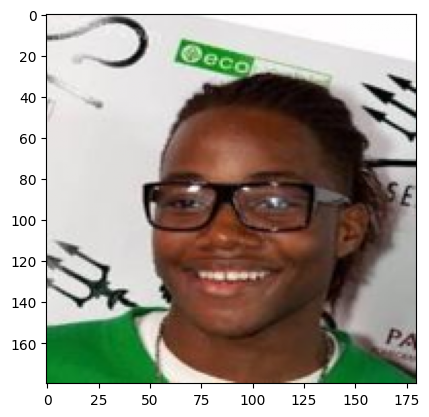

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(180, 180, 3)

In [ ]:
type(img)

numpy.ndarray

# 4. Creating Blury Images

In [9]:
def create_blurry_image(img, scale=4):
    height, width = img.shape[:2]
    img_small = cv2.resize(img, (width // scale, height // scale), interpolation=cv2.INTER_LINEAR)
    img_blur = cv2.resize(img_small, (width, height), interpolation=cv2.INTER_LINEAR)
    return img_blur

## 4.2 Visualizing Blury Images

In [ ]:
img_blurry = create_blurry_image(img)

In [ ]:
img_blurry

array([[[0.95196078, 0.93333333, 0.93137255],
        [0.95196078, 0.93333333, 0.93137255],
        [0.95036765, 0.9317402 , 0.92977941],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.95196078, 0.93333333, 0.93137255],
        [0.95196078, 0.93333333, 0.93137255],
        [0.95036765, 0.9317402 , 0.92977941],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.94963235, 0.93284314, 0.93014706],
        [0.94963235, 0.93284314, 0.93014706],
        [0.94828431, 0.9314951 , 0.92879902],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.02769608, 0.51397059, 0.14534314],
        [0.02769608, 0.51397059, 0.14534314],
        [0.02910539, 0

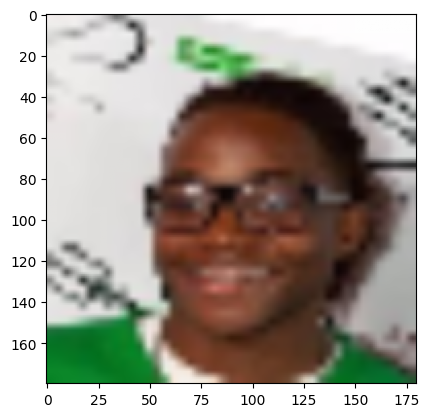

In [ ]:
plt.imshow(img_blurry)

# 5. Getting Images in X and Y, Blurry and Super Resolution Images

In [10]:
X = []
y = []

In [11]:
for img in imgs:
    y_img = load_images(img)
    y.append(y_img)
    x_img = create_blurry_image(y_img)
    X.append(x_img)

array([[[243, 238, 238],
        [243, 238, 238],
        [242, 238, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[243, 238, 238],
        [243, 238, 238],
        [243, 237, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[242, 238, 238],
        [242, 238, 238],
        [242, 237, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[  7, 131,  37],
        [  7, 131,  37],
        [  8, 132,  38],
        ...,
        [ 42,  82,  50],
        [ 44,  81,  50],
        [ 44,  81,  50]],

       [[  7, 131,  37],
        [  7, 131,  37],
        [  7, 131,  37],
        ...,
        [ 37,  84,  48],
        [ 39,  82,  48],
        [ 39,  82,  48]],

       [[  7, 131,  37],
        [  7, 131,  37],
        [  7, 131,  37],
        ...,
        [ 37,  84,  48],
        [ 39,  82,  48],
        [ 39,  82,  48]]], dtype=uint8)
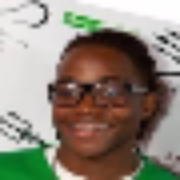

In [ ]:
X[0]

array([[[247, 241, 241],
        [245, 239, 239],
        [242, 236, 236],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[245, 240, 240],
        [244, 239, 239],
        [243, 237, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[242, 239, 238],
        [242, 238, 237],
        [242, 238, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[  4, 128,  34],
        [  5, 129,  35],
        [  7, 131,  37],
        ...,
        [ 41,  84,  51],
        [ 28,  57,  29],
        [ 22,  45,  19]],

       [[  8, 132,  38],
        [  7, 131,  37],
        [  7, 131,  37],
        ...,
        [ 40,  97,  57],
        [ 48,  91,  55],
        [ 48,  85,  51]],

       [[ 10, 134,  40],
        [  8, 132,  38],
        [  7, 131,  37],
        ...,
        [ 31,  99,  52],
        [ 47,  97,  59],
        [ 52,  96,  60]]], dtype=uint8)
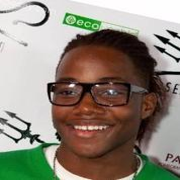

In [ ]:
y[0]

In [12]:
X = np.array(X)

In [13]:
y = np.array(y)

In [14]:
X.shape

(202599, 180, 180, 3)

In [18]:
X[0].max(), X[0].min()

(255, 1)

In [19]:
y[0].max(), y[0].min()

(255, 0)

In [21]:
X = X/255.0

In [ ]:
y = y/255.0

# 6. Making Datasets From Arrays

## 6.1 Split DataSets Into Train, Test, Val

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train into train and validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print(f"Training Set: {len(X_train)} images")
print(f"Validation Set: {len(X_val)} images")
print(f"Test Set: {len(X_test)} images")


In [ ]:
import tensorflow as tf

# Convert NumPy arrays to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Batch and shuffle the datasets
BATCH_SIZE = 16

train_dataset = train_dataset.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Add, UpSampling2D
from tensorflow.keras.models import Model

# Build ESRGAN Generator (Simplified)
def build_esrgan():
    inputs = Input(shape=(180, 180, 3))

    # Feature Extraction
    x = Conv2D(64, (3,3), padding='same')(inputs)
    x = LeakyReLU(alpha=0.2)(x)

    # Residual Blocks
    for _ in range(5):
        res = Conv2D(64, (3,3), padding='same')(x)
        res = BatchNormalization()(res)
        res = LeakyReLU(alpha=0.2)(res)
        x = Add()([x, res])  # Skip Connection

    # Upsampling
    x = UpSampling2D()(x)
    x = Conv2D(256, (3,3), padding='same', activation='relu')(x)

    # Output Layer
    outputs = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

    model = Model(inputs, outputs)
    return model




In [ ]:
# Compile Model
esrgan = build_esrgan()
esrgan.compile(optimizer='adam', loss='mse')


In [ ]:
# Train the ESRGAN model
esrgan.fit(train_dataset, validation_data=val_dataset, epochs=50)


In [ ]:
import tensorflow as tf
from tensorflow.image import psnr
predictions = esrgan.predict(test_dataset)

for i, (test_image, predicted_image) in enumerate(zip(test_dataset, predictions)):
    psnr_value = psnr(test_image[0], predicted_image)  # Assuming test_image is (blurry, sharp) pair
    print(f"PSNR for image {i}: {psnr_value.numpy()}")
